In [4]:
%cd ../data

/home/iseratho/repos/sicss-idea-6/data


In [26]:
!pip install openpyxl

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 242 kB 4.1 MB/s eta 0:00:01


In [5]:
import pandas as pd
from transformers import pipeline
import tqdm
tqdm.tqdm.pandas()

In [46]:
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("T'estimo!")

[{'label': 'Positive', 'score': 0.6600587964057922}]

In [29]:
all_mps = pd.read_excel('mps_uk_2020.xlsx')
all_mps = all_mps[all_mps['country']=='United Kingdom']
all_mps = all_mps.drop_duplicates(subset=['uid'])
all_mps

,name,member_id,party_id,pol_group_id,party_pol_group_id,chamber,uid,party,name_link,function,...,ches2017_multicult_salience,ches2017_multicult_dissent,ches2017_ethnic_minorities,ches2017_galtan_new,ches2017_galtan_new_clear,ches2017_galtan_new_salience,ches2017_people_vs_elite,ches2017_antielite_salience,ches2017_corrupt_salience,ches2017_members_vs_leadership
903,Neale Hanvey,15404,2,NaN,NaN,Parliament,2.104465e+08,Independent,https://www.facebook.com/Neale4KCPC/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,diane abbott,540,3,NaN,3.0,Parliament,1.538102e+08,Labour,http://www.parliament.uk/biographies/commons/m...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,debbie abrahams,541,3,NaN,3.0,Parliament,2.258574e+08,Labour,http://www.parliament.uk/biographies/commons/d...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,rushanara ali,546,3,NaN,3.0,Parliament,2.458491e+08,Labour,http://www.parliament.uk/biographies/commons/r...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,rosena allin-khan,549,3,NaN,3.0,Parliament,2.382227e+09,Labour,http://www.parliament.uk/biographies/commons/d...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,john woodcock,1184,12,NaN,3.0,Parliament,3.530540e+07,Independent,http://www.parliament.uk/biographies/commons/j...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2247,caroline lucas,919,13,NaN,3.0,Parliament,8.080290e+07,Green Party,http://www.parliament.uk/biographies/commons/c...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15270,Stephen Farry,15276,586,NaN,NaN,Parliament,5.833273e+08,Alliance,http://www.allianceparty.org,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15271,Colum Eastwood,15761,587,NaN,NaN,Parliament,2.092462e+07,Social Democratic & Labour Party,none,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
tweets = pd.read_json("tweets_new_flat.json", lines=True, dtype={"id": str})
tweets["text"] = tweets["text"].str.replace(r"http\S+", "")
print(len(tweets))

# sentiment = pd.read_csv('tweet_sentiment.csv', dtype={"id": str})
# print(len(sentiment))

# df_merge = tweets.merge(sentiment, on="id", how="left")

2232


/tmp/ipykernel_526/1707042939.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets["text"] = tweets["text"].str.replace(r"http\S+", "")


In [48]:
def get_sentiment(x):
    return sentiment_task(x)[0]['label']

tweets["sentiment"] = tweets["text"].progress_map(get_sentiment)

100%|███████████████████████████████████████████████████████████████████████████████| 2232/2232 [04:45<00:00,  7.81it/s]


In [56]:
tweets = tweets.merge(all_mps, left_on='author_id', right_on='uid', how="left")
print(len(df_merge))

tweets[["created_at", "author_id", "text", "party", "sentiment"]].head()

2232


,created_at,author_id,text,party,sentiment
0,2020-10-09 09:08:54+00:00,1194759472087998464,@AlyAShields @BetsiCadwaladr @healthdpt @NICEC...,Conservative,Positive
1,2020-06-30 16:09:32+00:00,1194759472087998464,Delighted to hear that an agreement has been r...,Conservative,Positive
2,2022-03-14 10:04:12+00:00,1193173567313240064,RT @sajidjavid: I can confirm that 21 very ill...,Conservative,Neutral
3,2021-10-19 11:09:58+00:00,1189861431048622080,In today's session of the Health and Social Ca...,Conservative,Neutral
4,2021-05-10 19:41:57+00:00,1189861431048622080,A number of rule changes will take place from ...,Conservative,Neutral


In [57]:
len(tweets)

2232

In [58]:
tweets["sentiment"].value_counts()

Neutral     995
Positive    960
Negative    277
Name: sentiment, dtype: int64

In [59]:
tweets[["sentiment", "party"]].value_counts()

sentiment  party                  
Neutral    Conservative               761
Positive   Conservative               751
Negative   Conservative               173
Neutral    Labour                     173
Positive   Labour                     152
Negative   Labour                      79
Neutral    Labour Co-op                20
           Scottish National Party     18
Positive   Scottish National Party     15
Neutral    Liberal Democrat            13
Positive   Liberal Democrat            12
Negative   Labour Co-op                10
Positive   Labour Co-op                10
Negative   Scottish National Party      9
           Liberal Democrat             5
Positive   Green Party                  3
dtype: int64

In [60]:
# def split_label(x):
#     print(x)
#     if x <= "2020-01-01 00:00:00+00:00":
#         return "before"
#     elif x > "2020-01-01 00:00:00+00:00" and x < "2020-01-01 00:00:00+00:00":
#         return "first_wave"
#     elif x >= "2020-09-01 00:00:00+00:00":
#         return "after_first"

tweets["split"] = "after_first"
tweets.loc[(tweets["created_at"] < "2020-09-01 00:00:00+00:00"), "split"] = "first_wave"
tweets.loc[(tweets["created_at"] < "2020-01-01 00:00:00+00:00"), "split"] = "before"
# tweets["split"] = "N/A"
# tweets["split"] = tweets["created_at"] <= "2020-01-01 00:00:00+00:00"
# tweets["split"] = tweets["created_at"].map(split_label)
tweets["split"].value_counts()

after_first    1402
first_wave      753
before           77
Name: split, dtype: int64

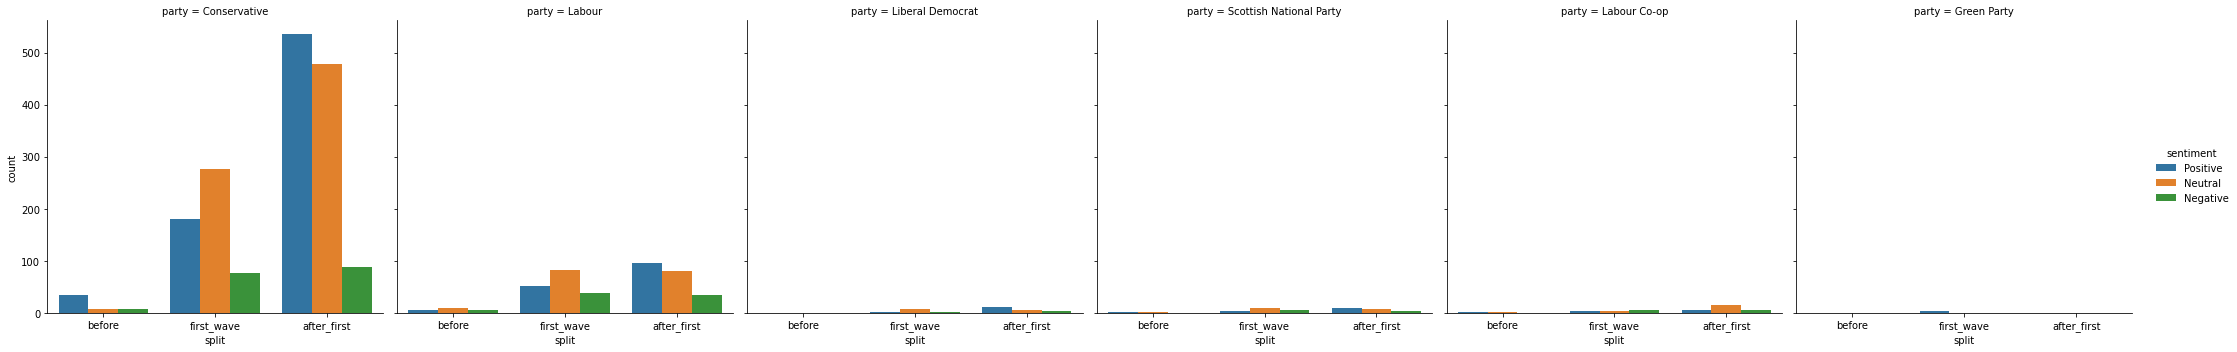

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(data=tweets, x="split", hue="sentiment", col="party", order=["before", "first_wave", "after_first"], kind="count")

In [66]:
tweets.groupby(["split","party"])["sentiment"].value_counts(normalize=True)

split        party                    sentiment
after_first  Conservative             Positive     0.485922
                                      Neutral      0.434151
                                      Negative     0.079927
             Labour                   Positive     0.452381
                                      Neutral      0.380952
                                      Negative     0.166667
             Labour Co-op             Neutral      0.592593
                                      Positive     0.222222
                                      Negative     0.185185
             Liberal Democrat         Positive     0.523810
                                      Neutral      0.285714
                                      Negative     0.190476
             Scottish National Party  Positive     0.476190
                                      Neutral      0.333333
                                      Negative     0.190476
before       Conservative             Positive     0

In [67]:
reshaped = tweets.groupby(["split","party"])["sentiment"].value_counts(normalize=True).rename("percent").reset_index()
reshaped

,split,party,sentiment,percent
0,after_first,Conservative,Positive,0.485922
1,after_first,Conservative,Neutral,0.434151
2,after_first,Conservative,Negative,0.079927
3,after_first,Labour,Positive,0.452381
4,after_first,Labour,Neutral,0.380952
5,after_first,Labour,Negative,0.166667
6,after_first,Labour Co-op,Neutral,0.592593
7,after_first,Labour Co-op,Positive,0.222222
8,after_first,Labour Co-op,Negative,0.185185
9,after_first,Liberal Democrat,Positive,0.523810


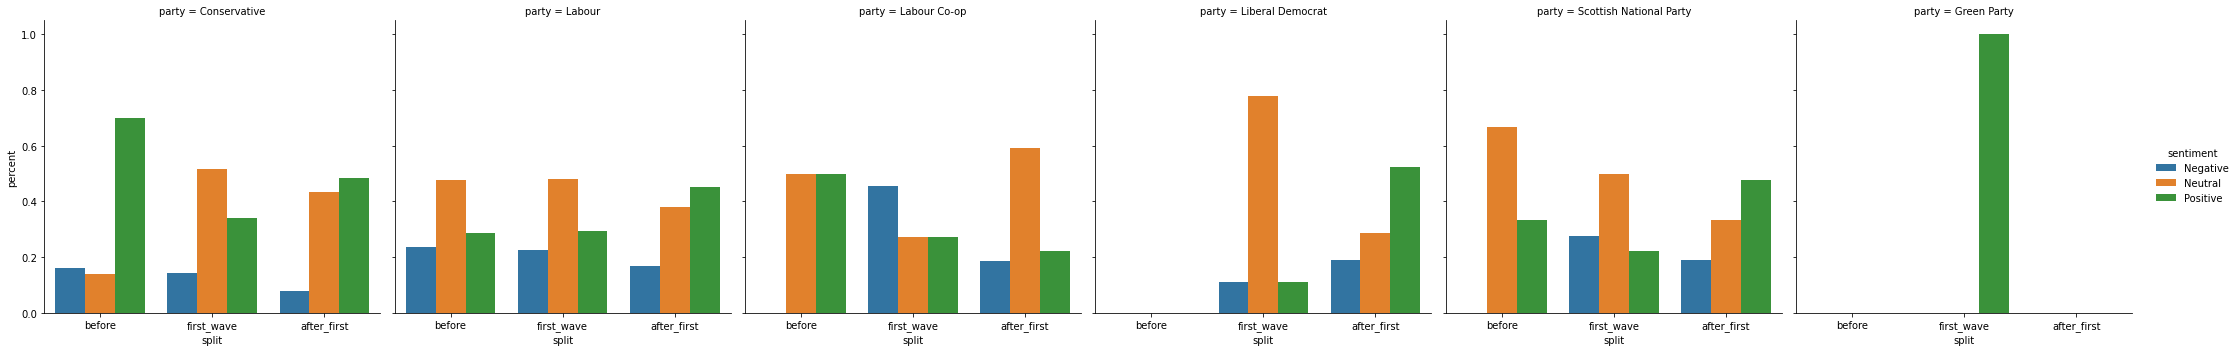

In [70]:
sns.catplot(data=reshaped, x="split", y="percent", hue="sentiment", col="party",
            order=["before", "first_wave", "after_first"], 
            hue_order=["Negative", "Neutral", "Positive"], kind="bar")

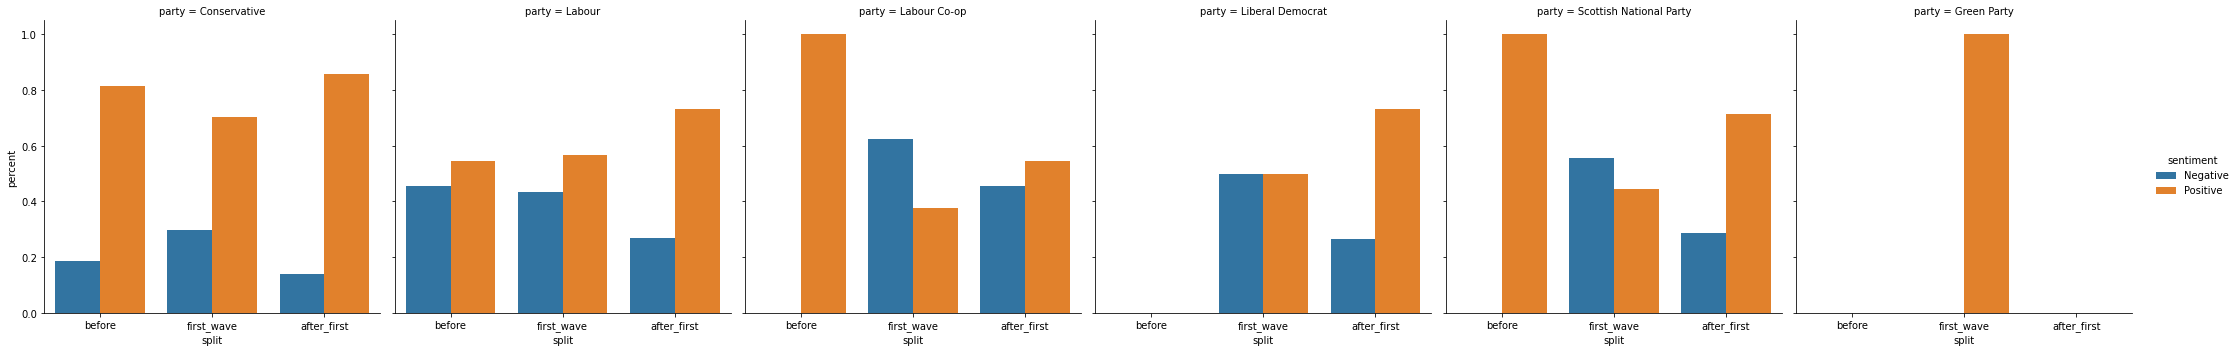

In [72]:
no_neutral = tweets[tweets["sentiment"] != "Neutral"]
reshaped_no_neutral = no_neutral.groupby(["split","party"])["sentiment"].value_counts(normalize=True).rename("percent").reset_index()
sns.catplot(data=reshaped_no_neutral, x="split", y="percent", hue="sentiment", col="party",
            order=["before", "first_wave", "after_first"], 
            hue_order=["Negative", "Positive"], kind="bar")

In [73]:
grouped = tweets.set_index("created_at").sort_index().groupby("sentiment").rolling("30D").count().div(30)["text"]
grouped#.plot()

sentiment  created_at               
Negative   2019-10-10 13:07:29+00:00    0.033333
           2019-10-10 13:38:36+00:00    0.066667
           2019-10-10 20:52:40+00:00    0.100000
           2019-10-17 09:08:09+00:00    0.133333
           2019-10-17 21:09:22+00:00    0.166667
                                          ...   
Positive   2022-07-12 14:11:06+00:00    0.500000
           2022-07-12 17:05:46+00:00    0.533333
           2022-07-15 15:20:25+00:00    0.500000
           2022-07-16 22:41:14+00:00    0.466667
           2022-07-19 13:49:46+00:00    0.500000
Name: text, Length: 2232, dtype: float64

<AxesSubplot:xlabel='created_at'>

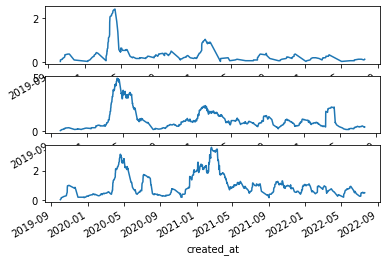

In [74]:
f, a = plt.subplots(3,1)
grouped.xs('Negative').plot(ax=a[0])
grouped.xs('Neutral').plot(ax=a[1])
grouped.xs('Positive').plot(ax=a[2])

# Findings

Tweets are dominated by conservative party.